MSSV: 19520954

Tên: Lê Thị Thanh Thanh

# Các thư viện cần thiết

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Dữ liệu iris (lấy 2 features đầu và 2 lớp đầu)

In [65]:
iris = load_iris()
X = iris.data[:, :2]
X = X[:100]
y = iris.target
y = y[:100]
dataset = pd.DataFrame(data=np.concatenate((X, y.reshape(-1,1)),axis=1),columns=['sepal length','sepal width','target'])

In [67]:
dataset.tail()

,sepal length,sepal width,target
95,5.7,3.0,1.0
96,5.7,2.9,1.0
97,6.2,2.9,1.0
98,5.1,2.5,1.0
99,5.7,2.8,1.0


In [68]:
dataset['target'].value_counts()

0.0    50
1.0    50
Name: target, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

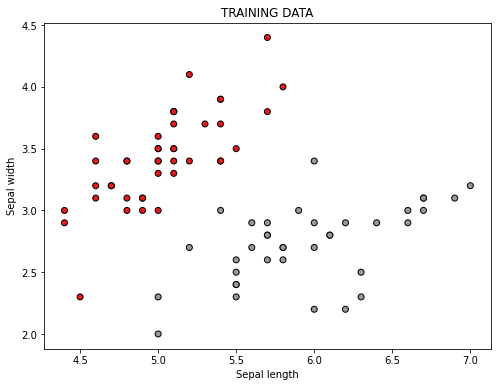

In [75]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.title('TRAINING DATA')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

# Logistic Regression

In [76]:
i = tf.keras.layers.Input(shape=(2))
X = tf.keras.layers.Dense(2,activation='sigmoid')(i)
model = tf.keras.models.Model(i,X)

In [77]:
model.compile(optimizer='sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [78]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = model.fit(X_train, y_train.reshape(-1), epochs=200)

Epoch 1/200
3/3 [==============================] - 0s 3ms/step - loss: 2.2206 - accuracy: 0.4625
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 1.5971 - accuracy: 0.4625
Epoch 3/200
3/3 [==============================] - 0s 3ms/step - loss: 1.1073 - accuracy: 0.4625
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.4625
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 0.5381 - accuracy: 0.5375
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8625
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.9875
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.9875
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.9875
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4000 - accuracy: 0.9875
Epoch 11/200
3/3 [===========

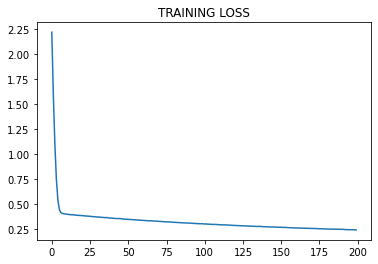

In [80]:
plt.plot(history.history['loss'])
plt.title('TRAINING LOSS')
plt.show()

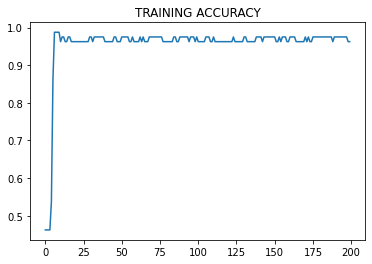

In [81]:
plt.plot(history.history['accuracy'])
plt.title('TRAINING ACCURACY')
plt.show()

In [82]:
y_predict = np.argmax(model.predict(X_test), axis=1)

In [83]:
print(y_test)

[1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1]


In [84]:
print(y_predict)

[1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1]


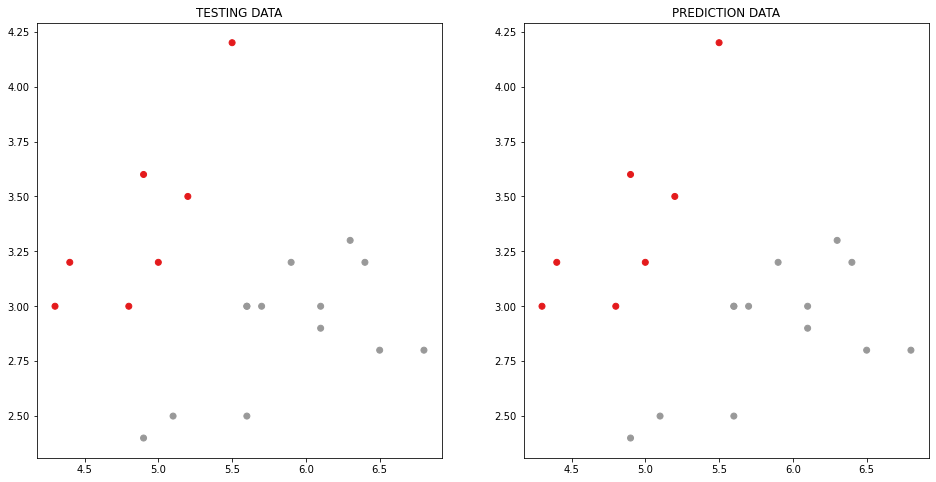

In [85]:
_, (test_ax, predict_ax) = plt.subplots(ncols=2, figsize=(16, 8))
# Plot the testing points
test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1)
test_ax.set_title('TESTING DATA')

# Plot the prediction points
predict_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_predict, cmap=plt.cm.Set1)
_ = predict_ax.set_title('PREDICTION DATA')